<a href="https://colab.research.google.com/github/MuhannedSh/ML-Occupied-Office/blob/main/Version_C_Intro_to_ML_Occupied_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Occupied Office**



Author: Muhanned Shaheen

- **Requirements**:
Your task is to build a machine learning model to predict whether or not an office room is occupied based on certain measurements included in the dataset.

- **Data Dictionary** :

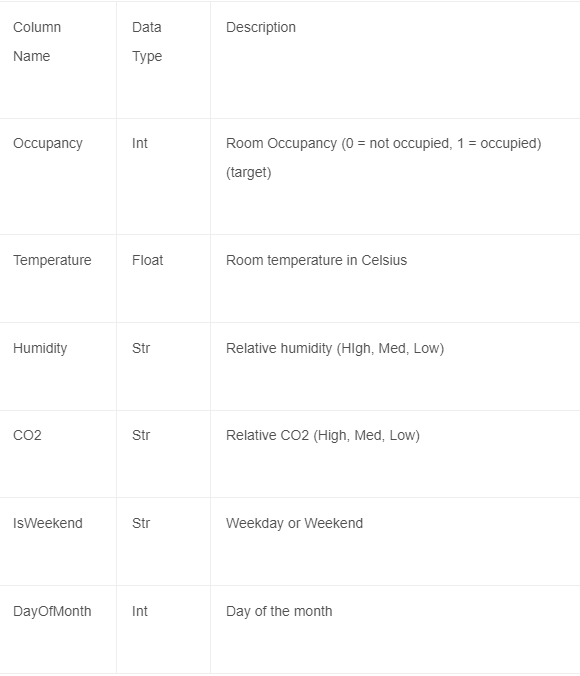

# **Imprting Libraries and loading data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import missingno as msno
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

In [ ]:
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/02-IntroML/Week08/Data/Belt2_C_occupancy_v2_final.csv'
df=pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  1758 non-null   object
 1   Humidity     1208 non-null   object
 2   CO2          1758 non-null   object
 3   IsWeekend    1758 non-null   object
 4   DayOfMonth   1758 non-null   int64 
 5   Occupancy    1758 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 82.5+ KB


,Temperature,Humidity,CO2,IsWeekend,DayOfMonth,Occupancy
0,22.245,Med,Med,Weekday,5,1
1,21.39,High,High,weekday,9,1
2,19_35666667,NaN,Low,Weekday,9,0
3,22.1,NaN,Low,Weekend,7,0
4,21.39,NaN,High,weekday,9,0



**Data set Shape**
  - **Rows:** 1758
  - **Columns:** 6


# **Data Cleaning**

## Missing Values Checking

In [ ]:
df.isna().sum()

Temperature      0
Humidity       550
CO2              0
IsWeekend        0
DayOfMonth       0
Occupancy        0
dtype: int64

<Axes: >

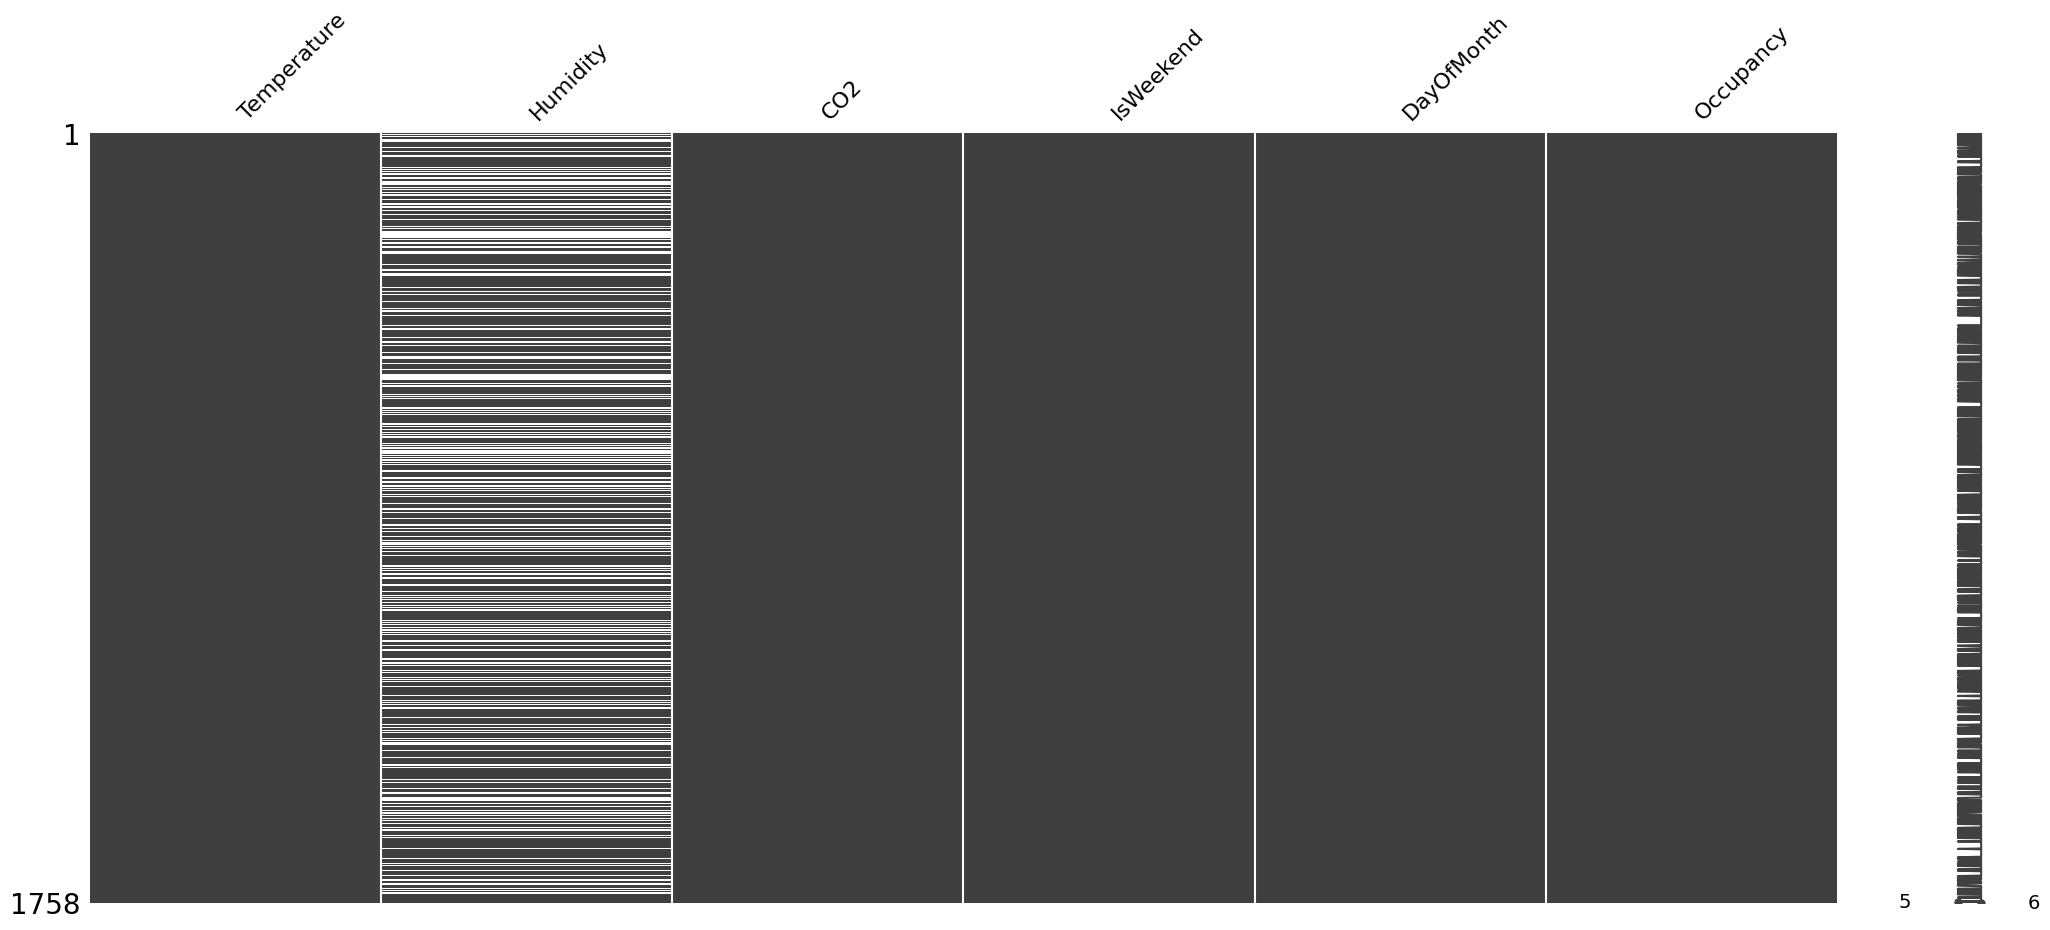

In [ ]:
# Visualize the missing values using the missingno matrix plot.
msno.matrix(df)

**Inspecting Missing Values**

- Numaric: There is no missing values in numaric data type feachers.

- Categorical: The dataset has 550 missing entries in the Humidity feature out of 1758 entries **(31%)**.



**Handling Missing Values**

- Filling missing values with "N/A" is the best choice for handling missing data in the Humidity feature, as it has a high number of unique values and a large proportion of missing data (31%). Using mean, median, or mode could lead to inaccurate results due to the unique characteristics of the Humidity feature and its missing data pattern.

In [ ]:
df['Humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1758 entries, 0 to 1757
Series name: Humidity
Non-Null Count  Dtype 
--------------  ----- 
1208 non-null   object
dtypes: object(1)
memory usage: 13.9+ KB


## Data Types checking

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  1758 non-null   object
 1   Humidity     1208 non-null   object
 2   CO2          1758 non-null   object
 3   IsWeekend    1758 non-null   object
 4   DayOfMonth   1758 non-null   int64 
 5   Occupancy    1758 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 82.5+ KB



- **The Following Feachers Should be Conveted to numaric**

  - `Temperature`

In [ ]:
# Inspecting inconsistent values in temperature feacher
df['Temperature'].value_counts()

Temperature
21.29                 36
20.39                 35
20.89                 32
20.7                  31
20.5                  31
                      ..
19.68                  1
22_125                 1
22.08                  1
21_125                 1
19.272000000000002     1
Name: count, Length: 293, dtype: int64

- **handling inconsistent values in temperature column**

In [ ]:
# Removing the "_" from temperature column by replacing it with decimal point "."
df['Temperature']=df['Temperature'].str.replace('_','.')
# Checking the .value_counts to confirm the change
df['Temperature'].value_counts()

Temperature
21.29                 36
20.39                 35
20.89                 32
20.7                  32
20.5                  31
                      ..
20.37333333            1
22.84                  1
19.68                  1
21.23                  1
19.272000000000002     1
Name: count, Length: 265, dtype: int64


- **Convert temperature column to a float dtype**.


In [ ]:
# Change the datatype of Temperature to float
df['Temperature']=df['Temperature'].astype(float)
# Confirm the datatype
df['Temperature'].dtype

dtype('float64')

## Inconsistent values in categorical columns

## inconsistent values inspecting

In [ ]:
inc_col=df.select_dtypes('object')
# loop through the list of string columns
for col in inc_col:
  print(f'Value For {col} column is: ')
  print(df[col].value_counts())
  print('\n')

Value For Humidity column is: 
Humidity
Low       432
Med       399
High      349
Hi         10
medium      9
low         9
Name: count, dtype: int64


Value For CO2 column is: 
CO2
Low     1041
Med      554
High     163
Name: count, dtype: int64


Value For IsWeekend column is: 
IsWeekend
Weekday    845
Weekend    375
weekday    353
weekend    185
Name: count, dtype: int64




**The following columns have inconsistent values that need to be addressed**

  - `Humidity`
  - `IsWeekend`

## Fixing Consistency: Humidity

In [ ]:
print(df['Humidity'].value_counts())
print('\n')

# Replace "Hi" with "High"
df['Humidity'] = df['Humidity'].replace('Hi','High')
# Replace "medium" with "Med"
df['Humidity'] = df['Humidity'].replace('medium','Med')
# Replace "low" with "Low"
df['Humidity'] = df['Humidity'].replace('low','Low')

# Check the value counts again to confirm
df['Humidity'].value_counts()

Humidity
Low       432
Med       399
High      349
Hi         10
medium      9
low         9
Name: count, dtype: int64




Humidity
Low     441
Med     408
High    359
Name: count, dtype: int64

## Fixing Consistency: IsWeekend

In [ ]:
print(df['IsWeekend'].value_counts())
print('\n')

# Replace "weekday" with "Weekday"
df['IsWeekend'] = df['IsWeekend'].replace('weekday','Weekday')
# Replace "weekend" with "Weekend"
df['IsWeekend'] = df['IsWeekend'].replace('weekend','Weekend')

# Check the value counts again to confirm
df['IsWeekend'].value_counts()

IsWeekend
Weekday    845
Weekend    375
weekday    353
weekend    185
Name: count, dtype: int64




IsWeekend
Weekday    1198
Weekend     560
Name: count, dtype: int64

## checking impossoble values in numaric data types

In [ ]:
df.describe().round(2)

,Temperature,DayOfMonth,Occupancy
count,1758.00,1758.00,1758.00
mean,21.12,6.87,0.33
std,4.38,1.70,0.47
min,19.00,4.00,0.00
25%,20.27,5.00,0.00
50%,21.00,7.00,0.00
75%,21.79,8.00,1.00
max,200.00,10.00,1.00


In [ ]:
df[df['Temperature'] > 25]


,Temperature,Humidity,CO2,IsWeekend,DayOfMonth,Occupancy
953,200.0,Med,Med,Weekday,4,1


- **There is an unrealistic value in the temperature column at row number 953. Converting it from 200 degrees Celsius to 20 degrees Celsius seems appropriate and would likely provide a more accurate representation of the data.**

In [ ]:
df['Temperature']=df['Temperature'].replace(200, 20)

In [ ]:
# impossoble values rechecing
df.describe().round(2)

,Temperature,DayOfMonth,Occupancy
count,1758.00,1758.00,1758.00
mean,21.01,6.87,0.33
std,0.99,1.70,0.47
min,19.00,4.00,0.00
25%,20.27,5.00,0.00
50%,21.00,7.00,0.00
75%,21.78,8.00,1.00
max,23.15,10.00,1.00


## Duplicate data checking

In [ ]:
df.duplicated().sum()
#droping dublicated values
df=df.drop_duplicates()

- **There is 53 Duplicated Values and it will be dropped**

In [ ]:
df.duplicated().sum()

0

 - **Checking for duplicated rows across the DataFrame**.

In [ ]:
duplicated_rows_all=df.duplicated(keep=False)
# Calculate the sum of the duplicated_rows
duplicated_rows_all.sum()

0

## Cardinalty checking for categorical feacher

In [ ]:
cat=df.select_dtypes('object').columns
df[cat].describe()

,Humidity,CO2,IsWeekend
count,883,1319,1319
unique,3,3,2
top,Low,Low,Weekday
freq,312,760,908


- **There is no high cardinality features**

# **Exploring data**

## Categroical vs Target

In [ ]:
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT

#old function did not have an if statement ---------------------------- to make a histoplot for 'class'

  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



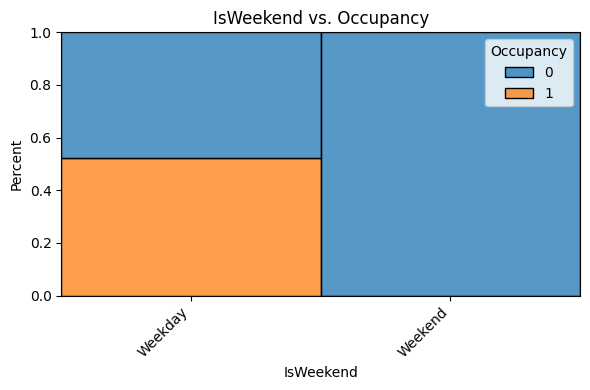

In [ ]:
plot_categorical_vs_target(df, 'IsWeekend', 'Occupancy' , target_type = 'class');

- **The chart illustrate that offices tend to be occupied during weekdays but are completely unoccupied on weekend**.

## Numaric vs Target

### Heat map creating

In [ ]:
# Find correlations
corr_data=df.corr(numeric_only=True)
corr_data

,Temperature,DayOfMonth,Occupancy
Temperature,1.000000,-0.421580,0.280003
DayOfMonth,-0.421580,1.000000,0.045958
Occupancy,0.280003,0.045958,1.000000


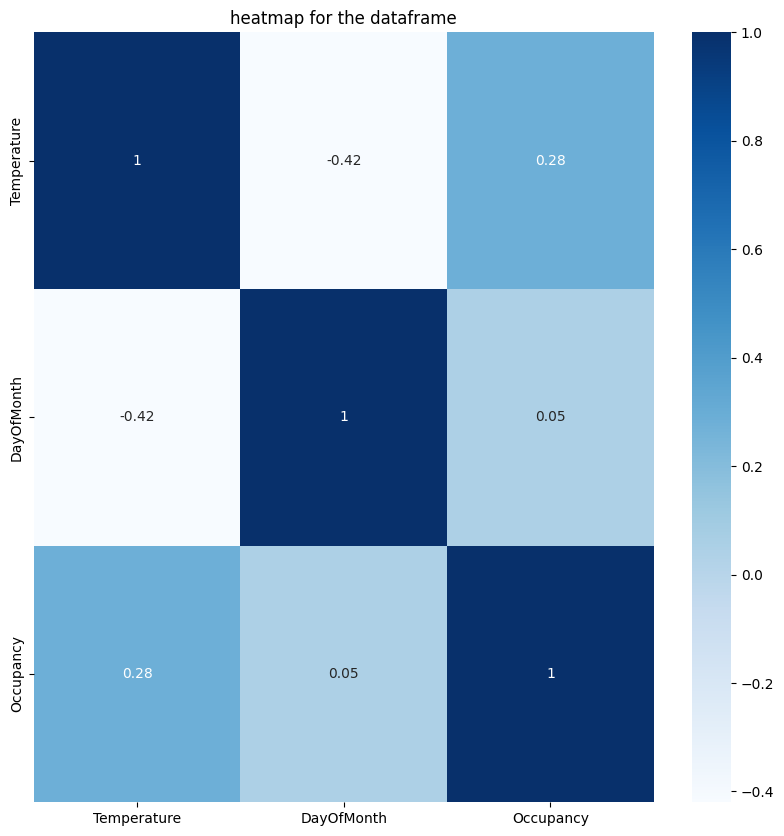

In [ ]:
# Heatmape plotting
fig,ax=plt.subplots(figsize=(10,10))
corr_data=round(corr_data,2)
sns.heatmap(data=corr_data,cmap='Blues',annot=True);
ax.set(title='heatmap for the dataframe');

- **There is no high correlation between features, but we will try to figure out relations by plotting**.

### Numarical Vs Target function

In [ ]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.yticks(range(0, 3))
  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax


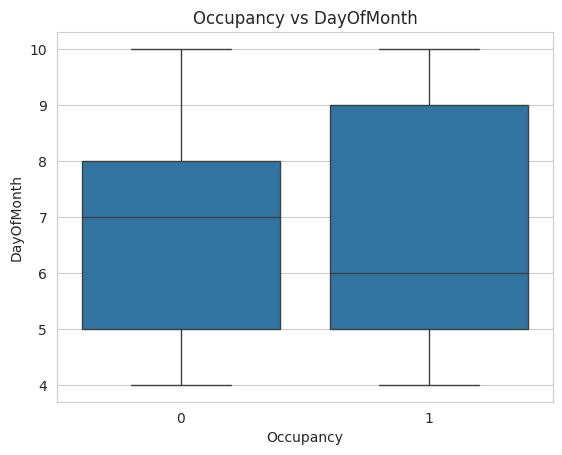

In [ ]:
sns.boxplot(x='Occupancy', y='DayOfMonth', data=df)
plt.title('Occupancy vs DayOfMonth')
plt.xlabel('Occupancy')
plt.ylabel('DayOfMonth')
plt.show()

- **The plot illustrates that the unoccupied office rooms are, on average, on day 7 of the month, while the average occupancy of office rooms on day 6**.

# **Data preprocessing**

##Check class balance


In [ ]:
df['Occupancy'].value_counts()

Occupancy
0    846
1    473
Name: count, dtype: int64

- **The data is  imbalanced. There are 846 instances where the office room is not occupied (Occupancy = 0), while there are 473 instances where the office room is occupied (Occupancy = 1)**

## Defning Feature Matrix, Target Variable, and Train-Test Splitting


In [ ]:
# Define features and target
X = df.drop(columns = 'Occupancy')
y = df['Occupancy']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Preprocessing pipeline for numrical features

In [ ]:
num_cols= make_column_selector(dtype_include='number')

# Instantiate the numaric preprocessors
scaler = StandardScaler()
# Make pipeline for num dtype with scaler
num_pipe = make_pipeline(scaler)
# Making a numaric dtype_tuple for ColumnTransformer
num_tuple = ('numeric',num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7821462141f0>)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1319 non-null   float64
 1   Humidity     883 non-null    object 
 2   CO2          1319 non-null   object 
 3   IsWeekend    1319 non-null   object 
 4   DayOfMonth   1319 non-null   int64  
 5   Occupancy    1319 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 72.1+ KB


## Preprocessing Pipeline for Orinal

- **ordinal encoding vs one-hot encoding**:
 - The dataset has two ordinal features (Humidity, CO2) as the 'Humidity' and 'CO2' columns are considered ordinal due to their categories ('Low', 'Med', 'High') having a meaningful order or ranking.

- including 'NA' as the first category in the qual_cond_order list ensures consistent and explicit handling of missing values during the ordinal encoding process, while also preserving the ordinal relationships and interpretability of the encoded data

In [ ]:
# define a list of columns to encode as ordinal
ordinal_cols = ['Humidity','CO2']

# Specifying the order of categories in Humidity/CO2 columns
qual_cond_order=['NA','Low','Med', 'High']
# WE NEED JUSTFICATION FOR WHY CHOSING N/A
## Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order,qual_cond_order]

impute_na_ord=SimpleImputer(strategy='constant',fill_value='NA')
ord_encoder=OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()
ord_pipe = make_pipeline(impute_na_ord,ord_encoder,scaler_ord)

ord_tuple = ('ordinal',ord_pipe, ordinal_cols)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Low', 'Med', 'High'],
                                            ['NA', 'Low', 'Med', 'High']])),
                ('standardscaler', StandardScaler())])

## Preprocessing pipeline for categorical features

In [ ]:
cat_cols=make_column_selector(dtype_include='object')

# Instantiate the numaric preprocessors
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline for cat dtype with ohe_encoder
cat_pipe = make_pipeline(ohe)

ohe_tuple = ('categorical',cat_pipe, cat_cols)
ohe_tuple
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
df['Humidity'].value_counts()

Humidity
Low     312
Med     303
High    268
Name: count, dtype: int64

In [ ]:
df['CO2'].value_counts()

CO2
Low     760
Med     432
High    127
Name: count, dtype: int64

## Column transfare instantiation

In [ ]:
preprocessor =ColumnTransformer([num_tuple, ord_tuple,ohe_tuple], verbose_feature_names_out=False,remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Low',
                                                                              'Med',
                                                                              'High'],
                                                                             ['NA',
                                                                              'Low',
                                                                              'Med',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Humidity', 'CO2']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x782146216590>)],
                  verbose_feature_names_out=False)

# **Modeling**

- **We will explore KNN, Logistic Regression, and Random Forest as potential modeling techniques**.
  - The chosen classifiers (KNN, Logistic Regression, Random Forest) are well-suited for predicting occupancy based on the dataset's features due to their ability to effectively handle binary classification tasks. This aligns with the dataset's target class (Occupancy) and ensures effective classification between occupied and unoccupied offices.

## Classification metric function definition

In [ ]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

## logistic regression

### Default logistic regression (Before Tuning)

#### Instantiate a Default Model


In [ ]:
log_reg=LogisticRegression(max_iter=1000, random_state=42)

#### Model Pipeline

In [ ]:
# Model Pipeline with default preprocessor and default model
log_reg_pipe = make_pipeline(preprocessor, log_reg)

#### Fit the model pipeline on the training data

In [ ]:
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencod...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'CO2']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x782146216590>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

#### Evaluation the default model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       652
           1       0.68      0.82      0.74       337

    accuracy                           0.81       989
   macro avg       0.79      0.81      0.79       989
weighted avg       0.82      0.81      0.81       989



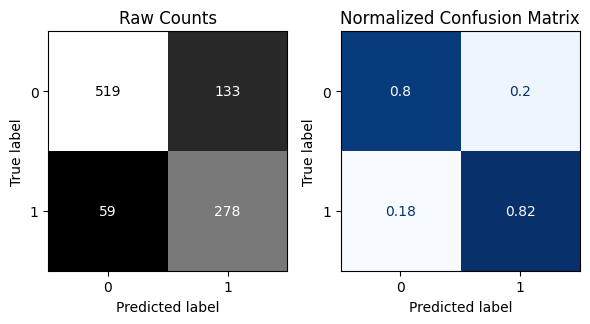


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       194
           1       0.74      0.81      0.77       136

    accuracy                           0.81       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.81      0.81      0.81       330



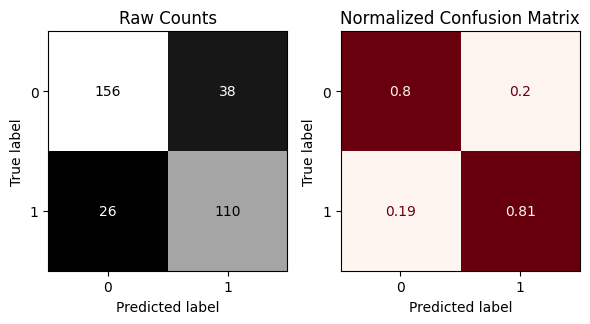

In [ ]:
# Call custom function for evaluation
evaluate_classification(log_reg_pipe,X_train, y_train, X_test, y_test)

- **Logistic Regresion before tunning Metrics summary**:
  - True Negatives (TN): 80% of unoccupied office rooms were correctly classified as unoccupied.
  - False Negatives (FN): 19% of unoccupied office rooms were incorrectly classified as occupied.
  - False Positives (FP): 20% of occupied office rooms were incorrectly classified as unoccupied.
  - True Positives (TP): 81% of occupied office rooms were correctly classified as occupied.

- The logistic regression model exhibits decent performance in predicting both occupied and unoccupied office rooms, with precision scores of 0.74 for Class 1 and 0.86 for Class 0. It shows slightly better recall for unoccupied rooms (0.80) compared to occupied rooms (0.81). The model achieves an overall accuracy of 81%, with F1-scores of 0.77 for Class 1 and 0.83 for Class 2 ,However, there is room for improvement in correctly identifying unoccupied spaces. (do not talk about accuracy)

### Default Logistic regression tuning



In [ ]:
# dispay list of LR parameters
log_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['NA',
                                                                                 'Low',
                                                     

#### Define the targeted parameters to be tuned

In [ ]:
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}



l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }

l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}

none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}

param_grid = [l2_params, l1_params, elasticnet_params, none_params]


#### Instaniate the gridsearchcv

In [ ]:
gs_lr_tuned = GridSearchCV(log_reg_pipe, param_grid, verbose=5, n_jobs=-1, scoring='recall_macro')


#### Fit the gridsearch on the training data

In [ ]:
gs_lr_tuned.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='con...
                          'logisticregression__solver': ['liblinear', 'saga']},
                         {'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3,
                                                           0.4, 0.5, 0.6, 0.7,
                                                           0.8, 0.9, 1],
                          'logisticregression__penalty': ['elasticnet'],
                          'logisticregression__solver': ['saga']},
                         {'logisticregression__penalty': [None],
                          'logisticregression__solver': ['lbfgs', 'newton-cg',
                                                         'newton-cholesky',
                                                         'sag', 'saga']}],
             scoring='recall_macro', verbose=5)

#### Displaying best parametrs

In [ ]:
gs_lr_tuned.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

#### Evaluting the Tuned Logistic Regression Model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       652
           1       0.68      0.82      0.74       337

    accuracy                           0.81       989
   macro avg       0.79      0.81      0.79       989
weighted avg       0.82      0.81      0.81       989



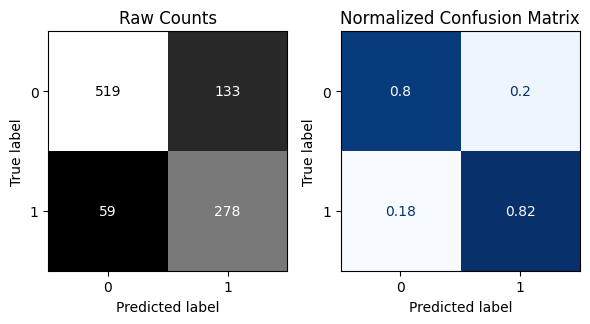


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       194
           1       0.74      0.81      0.77       136

    accuracy                           0.81       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.81      0.81      0.81       330



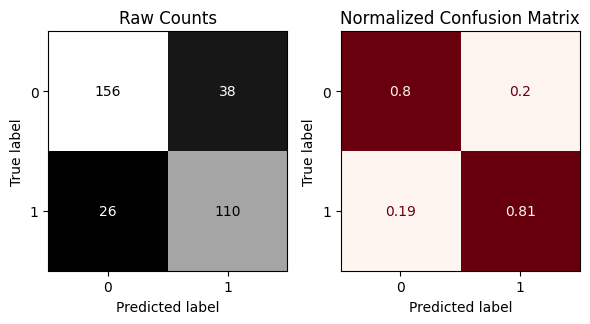

In [ ]:
best_lr_tuned = gs_lr_tuned.best_estimator_

evaluate_classification(best_lr_tuned,X_train, y_train, X_test, y_test)

- In general , both the model's performance metrics before and after tuning shows no significant differences. Both before and after tuning, the model achieved similar precision, recall, and F1-score values for both clases

## KNN

### Default Knn (Before Tuning)

#### Instantiate the Model


In [ ]:
knn=KNeighborsClassifier()

#### Model Pipeline

In [ ]:
knn_pipe=make_pipeline(preprocessor, knn)

#### Fit the model pipeline on the training data

In [ ]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencod...
                                                                                               'Med',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'CO2']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x782146216590>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### evaluation the default model (before tuning)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       652
           1       0.79      0.84      0.81       337

    accuracy                           0.87       989
   macro avg       0.85      0.86      0.86       989
weighted avg       0.87      0.87      0.87       989



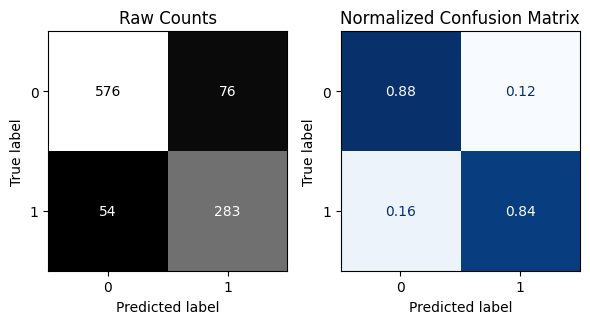


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       194
           1       0.79      0.74      0.76       136

    accuracy                           0.81       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.81      0.81       330



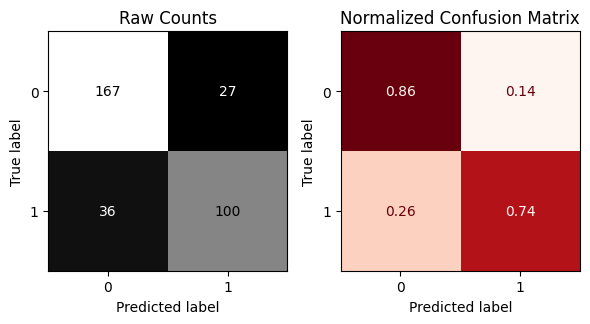

In [ ]:
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

**KNN before tunning Metrics summary**:

- True Negatives (TN): 86% of unoccupied office rooms were correctly classified - as unoccupied.
- False Negatives (FN): 26% of unoccupied office rooms were incorrectly classified as occupied.
- False Positives (FP): 26% of occupied office rooms were incorrectly classified as unoccupied.
- True Positives (TP): 74% of occupied office rooms were correctly classified as occupied.

- The default KNN model, demonstrates balanced performance in predicting both occupied and unoccupied office rooms, with precision scores of 0.79 for Class 1 and 0.82 for Class 0. While it exhibits slightly better recall for unoccupied rooms (0.86) compared to occupied rooms (0.74),However, there is room for improvement in correctly identifying both occupied and unoccupied spaces.

### KNN (after tuning)

#### Defining targets KNN parameters

In [ ]:
params_knn={'kneighborsclassifier__n_neighbors':list(range(1,55,2)),
"kneighborsclassifier__algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

#### Instantiate GridSearchCV, Fit, and get the Best K



In [ ]:
gs_knn=GridSearchCV(knn_pipe,params_knn,n_jobs=-1,verbose=True)
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='con...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x782146216590>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11, 13, 15, 17,
                                                               19, 21, 23, 25,
                                                               27, 29, 31, 33,
                                                               35, 37, 39, 41,
                                                               43, 45, 47, 49,
                                                               51, 53]},
             verbose=True)

In [ ]:
gs_knn.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 19}

 - **Best params is**:
   - `k=19`

#### Evaluate Tunned Knn model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       652
           1       0.69      0.80      0.75       337

    accuracy                           0.81       989
   macro avg       0.79      0.81      0.80       989
weighted avg       0.82      0.81      0.82       989



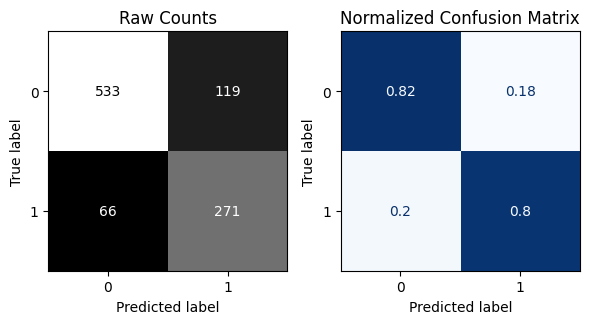


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       194
           1       0.76      0.81      0.79       136

    accuracy                           0.82       330
   macro avg       0.81      0.82      0.81       330
weighted avg       0.82      0.82      0.82       330



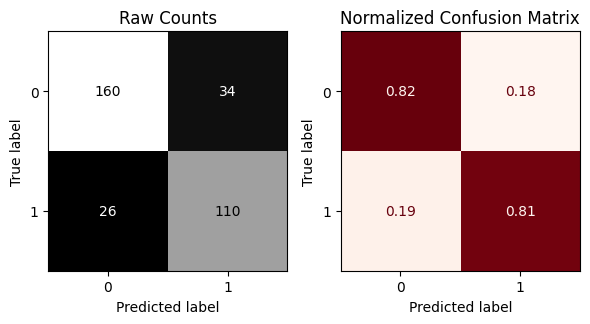

In [ ]:
evaluate_classification(gs_knn.best_estimator_, X_train, y_train, X_test, y_test)


- Before tuning, the KNN model showed an accuracy of 81%. It correctly identified occupied rooms (Class 1) with a recall of 0.74 and unoccupied rooms (Class 0) with a recall of 0.86. The average recall was 0.81, and the macro average recall was 0.80.
- After tuning, the model's recall for occupied rooms improved to 0.81, while for unoccupied rooms, it slightly decreased to 0.82. The average recall remained at 0.82, and the macro average recall increased to 0.81.

## Random Forest Classifier

### Default Random Forest Classifier  (Before Tuning)

#### Instantiate the Model


In [ ]:
rf_classifier = RandomForestClassifier()

#### Model Pipeline

In [ ]:
rf_classifier_pipe=make_pipeline(preprocessor,rf_classifier)

#### Fit the model pipeline on the training data

In [ ]:
rf_classifier_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencod...
                                                                                               'Med',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'CO2']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x782146216590>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier', RandomForestClassifier())])

#### Evaluation the default model (before tuning)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       652
           1       0.84      0.92      0.88       337

    accuracy                           0.91       989
   macro avg       0.90      0.91      0.91       989
weighted avg       0.92      0.91      0.91       989



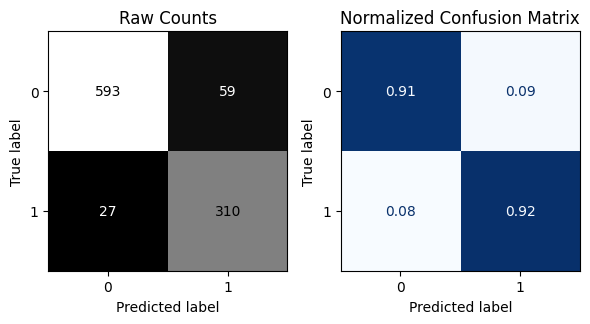


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       194
           1       0.72      0.62      0.67       136

    accuracy                           0.75       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.75      0.74       330



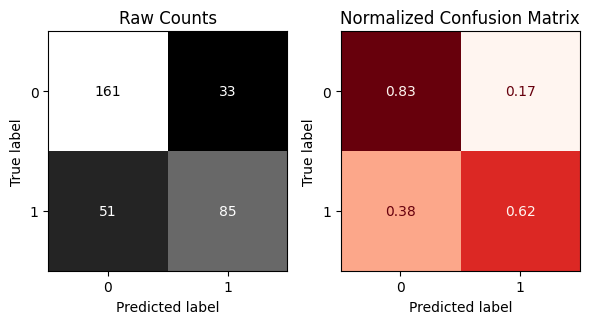

In [ ]:
evaluate_classification(rf_classifier_pipe,X_train, y_train, X_test, y_test)

**Default Random Forest  Metrics summary**:

- True Negatives (TN): 83% of unoccupied office rooms were correctly classified as unoccupied.

- False Negatives (FN): 38% of unoccupied office rooms were incorrectly classified as occupied.

- False Positives (FP): 17% of occupied office rooms were incorrectly classified as unoccupied.

- True Positives (TP): 62% of occupied office rooms were correctly classified as occupied.

- The default random forest classifier model, shows predicting unoccupied office rooms with a precision of 0.76, while its precision for occupied rooms is 0.72. It exhibits good recall for unoccupied rooms (0.83) but lower recall for occupied rooms (0.62). Overall F1-scores of 0.79 for unoccupied rooms and 0.67 for occupied rooms. However, there is room for improvement in correctly identifying occupied spaces.

### Random Forest Classifier  (After Tuning)

In [ ]:
rf_classifier_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['NA',
                                                                                 'Low',
                                                     

#### Define the targeted parameters to be tuned

In [ ]:
params_rf = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }



#### Instaniate the gridsearch

In [ ]:
gs_rf=GridSearchCV(rf_classifier_pipe, params_rf, verbose=True, n_jobs=-1,cv=3 )# Fit gs on training data


In [ ]:
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy...
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150,
                                                                  200],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=True)

In [ ]:
gs_rf.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__n_estimators': 10,
 'randomforestclassifier__oob_score': True}

#### Evaluation the tuned model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       652
           1       0.79      0.84      0.81       337

    accuracy                           0.87       989
   macro avg       0.85      0.86      0.85       989
weighted avg       0.87      0.87      0.87       989



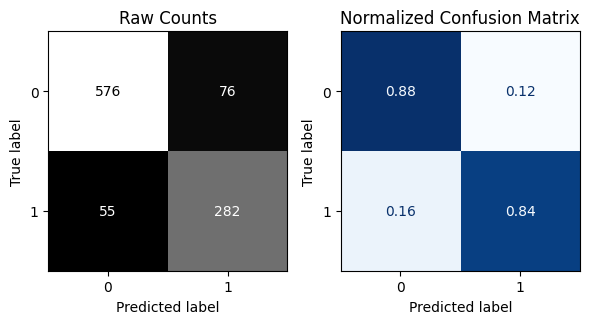


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       194
           1       0.77      0.70      0.73       136

    accuracy                           0.79       330
   macro avg       0.78      0.77      0.78       330
weighted avg       0.79      0.79      0.79       330



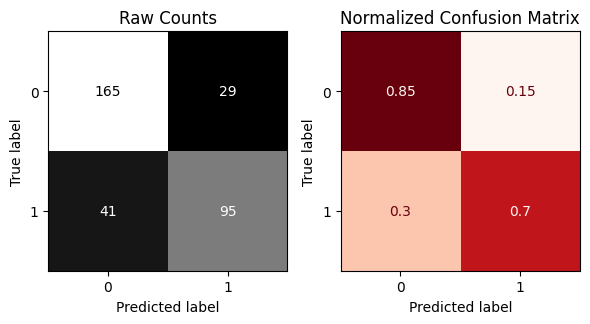

In [ ]:
evaluate_classification(gs_rf.best_estimator_,X_train, y_train, X_test, y_test)

- Before tuning, the random forest classifier had a recall macro score of 0.73, with precision values of 0.76 for unoccupied rooms and 0.72 for occupied rooms. After tuning, the recall macro score improved to 0.77, with precision values of 0.80 for unoccupied rooms and 0.77 for occupied rooms.

### Random forest classifier using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


rf_smote = RandomForestClassifier(random_state=42)

rf_smote_pipe = make_sampler_pipeline(preprocessor, smote, rf_smote)

In [ ]:
# Define param grid with options to try
params_2 = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }
# Instaniate GridSearchCV
gs_rf_smote = GridSearchCV(rf_smote_pipe, params_2, verbose=True, n_jobs=-1 )
gs_rf_smote.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7821462141f0>),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='con...
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150,
                                                                  200],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=True)

In [ ]:
gs_rf_smote.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       652
           1       0.73      0.93      0.82       337

    accuracy                           0.86       989
   macro avg       0.84      0.88      0.85       989
weighted avg       0.88      0.86      0.86       989



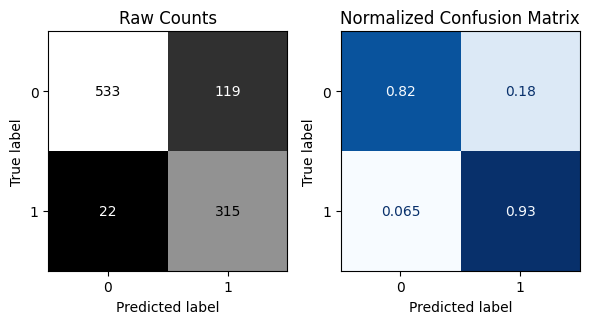


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       194
           1       0.75      0.86      0.80       136

    accuracy                           0.83       330
   macro avg       0.82      0.83      0.82       330
weighted avg       0.84      0.83      0.83       330



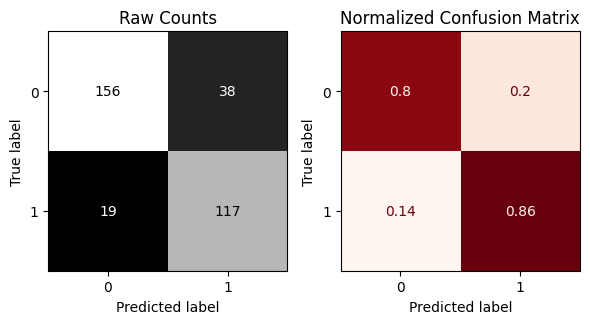

In [ ]:
evaluate_classification(gs_rf_smote.best_estimator_, X_train, y_train, X_test, y_test)

**Default Random Forest using SMOTE Metrics Summary** :
  - True Negatives (TN): 80% of unoccupied office rooms were correctly classified as unoccupied.
  - False Negatives (FN): 14% of unoccupied office rooms were incorrectly classified as occupied.
  - False Positives (FP): 20% of occupied office rooms were incorrectly classified as unoccupied.
  - True Positives (TP): 86% of occupied office rooms were correctly classified
  as occupied.

-
After applying SMOTE, the random forest model demonstrated an improvement in recall from 0.77 to 0.83. This enhancement signifies that the model's ability to correctly classify instances, especially in identifying both occupied and unoccupied office rooms, was significantly boosted by SMOTE. The precision for unoccupied rooms remained high at 0.89, while for occupied rooms, it slightly decreased to 0.75. However, the overall performance of the model improved, with the weighted average of precision, recall, and F1-score reaching 0.83

# **Tuned models Comparison**




Tuned logistic regression:
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       652
           1       0.68      0.82      0.74       337

    accuracy                           0.81       989
   macro avg       0.79      0.81      0.79       989
weighted avg       0.82      0.81      0.81       989



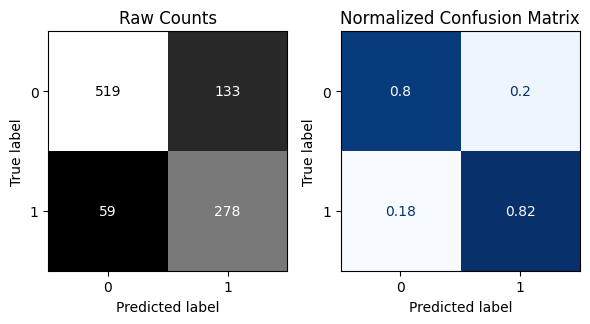


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       194
           1       0.74      0.81      0.77       136

    accuracy                           0.81       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.81      0.81      0.81       330



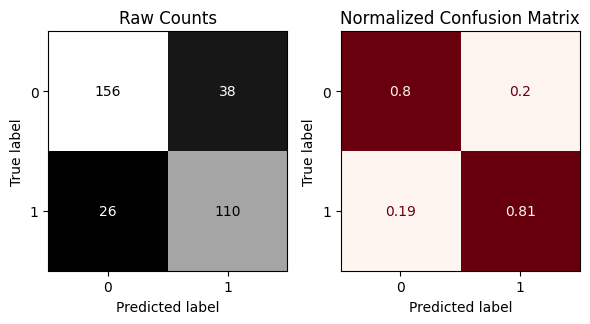


------------------------------------------------------------

Tuned Random Forest:
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       652
           1       0.79      0.84      0.81       337

    accuracy                           0.87       989
   macro avg       0.85      0.86      0.85       989
weighted avg       0.87      0.87      0.87       989



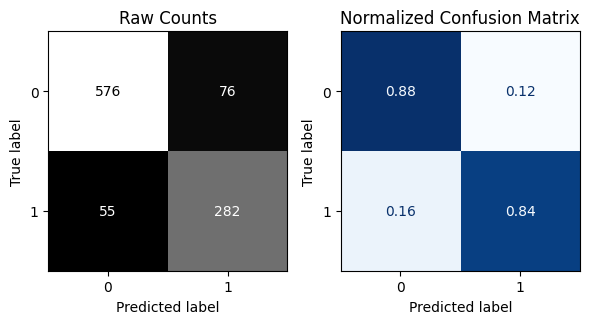


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       194
           1       0.77      0.70      0.73       136

    accuracy                           0.79       330
   macro avg       0.78      0.77      0.78       330
weighted avg       0.79      0.79      0.79       330



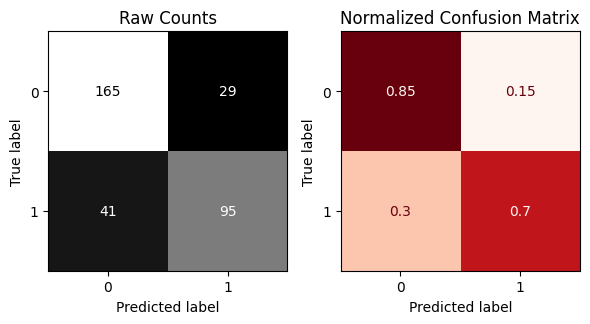

------------------------------------------------------------

Smote Random Forest:
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       652
           1       0.73      0.93      0.82       337

    accuracy                           0.86       989
   macro avg       0.84      0.88      0.85       989
weighted avg       0.88      0.86      0.86       989



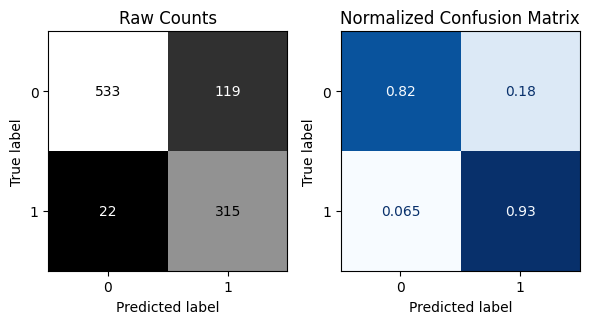


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       194
           1       0.75      0.86      0.80       136

    accuracy                           0.83       330
   macro avg       0.82      0.83      0.82       330
weighted avg       0.84      0.83      0.83       330



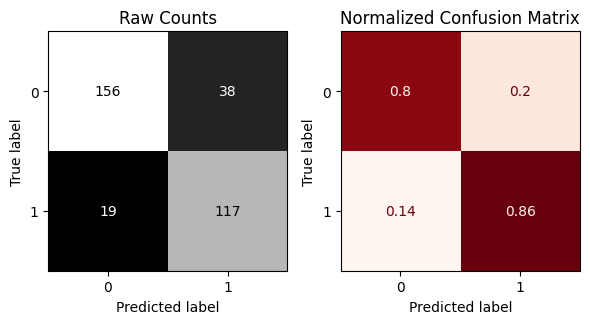

------------------------------------------------------------

Tuned KNN:
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       652
           1       0.69      0.80      0.75       337

    accuracy                           0.81       989
   macro avg       0.79      0.81      0.80       989
weighted avg       0.82      0.81      0.82       989



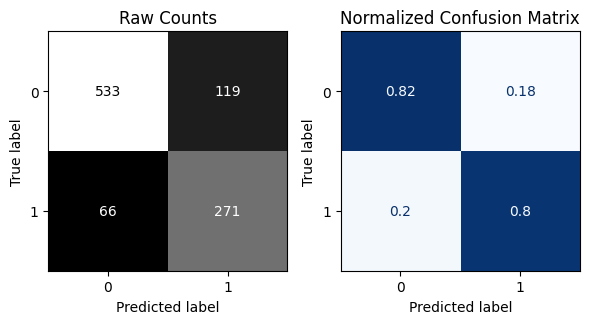


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       194
           1       0.76      0.81      0.79       136

    accuracy                           0.82       330
   macro avg       0.81      0.82      0.81       330
weighted avg       0.82      0.82      0.82       330



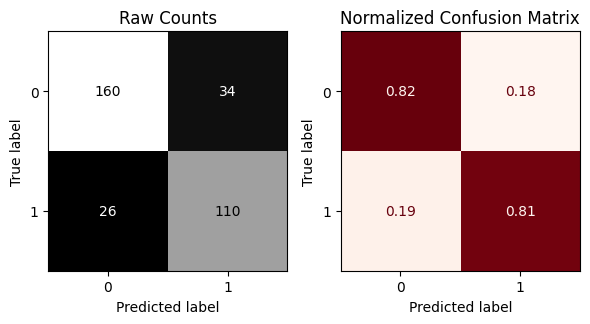

In [ ]:
print(f"Tuned logistic regression:")
result_tunedlogreg = evaluate_classification(best_lr_tuned,X_train, y_train, X_test, y_test)
print()


print("-"*60)
print()
print(f"Tuned Random Forest:")
result_smoteknn = evaluate_classification(gs_rf.best_estimator_, X_train, y_train, X_test, y_test)



print("-"*60)
print()
print(f"Smote Random Forest:")
result_smoteknn = evaluate_classification(gs_rf_smote.best_estimator_, X_train, y_train, X_test, y_test)



print("-"*60)
print()
print(f"Tuned KNN:")
result_smoteknn = evaluate_classification(gs_knn.best_estimator_, X_train, y_train, X_test, y_test)


- In the comparison of models, considering all metrics, the best performing model is the **Random Forest classifier using SMOTE**. It demonstrates a balanced performance with precision of 0.89 for unoccupied rooms and 0.75 for occupied rooms. Its recall for unoccupied rooms is 0.80 and for occupied rooms is 0.86, indicating its effectiveness in identifying both classes.Furthermore, the model achieves an impressive macro-average recall of 0.83, highlighting its capability to effectively classify both classes while minimizing false predictions.


- **Random Forest using SMOTE Normalized Confusion matrix Summary** :
 - True Negatives (TN): 80% of unoccupied office rooms were correctly classified as unoccupied.
  - False Negatives (FN): 14% of unoccupied office rooms were incorrectly classified as occupied.
  - False Positives (FP): 20% of occupied office rooms were incorrectly classified as unoccupied.
  - True Positives (TP): 86% of occupied office rooms were correctly classified
  as occupied.

# **ROC for best modle**

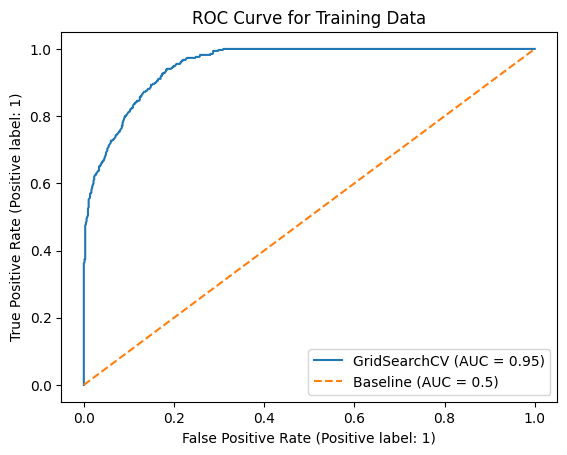

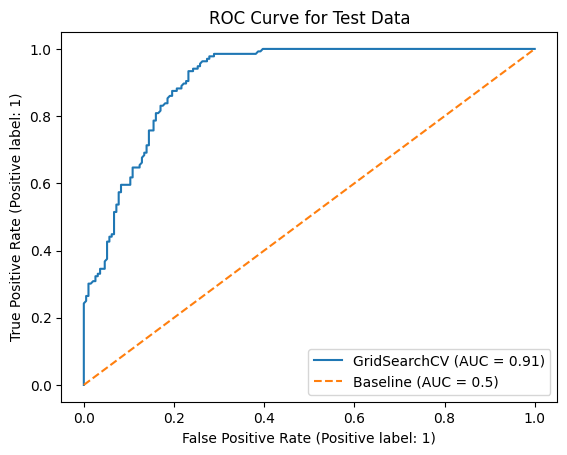

In [ ]:

# ROC curve for the best estimator on the training data
RocCurveDisplay.from_estimator(gs_rf_smote, X_train, y_train)
plt.plot([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')
plt.legend()
plt.title("ROC Curve for Training Data")
plt.show()

# ROC curve for the best estimator on the test data
RocCurveDisplay.from_estimator(gs_rf_smote, X_test, y_test)
plt.plot([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')
plt.legend()
plt.title("ROC Curve for Test Data")
plt.show()

- The Random Forest classifier's AUC of 0.91 highlights its strong ability to separate classes effectively, ensuring high sensitivity and low false positives across different thresholds.